In [2]:
using Revise, StatsBase, DataFrames, CSV, QARBoM

┌ Warning: The active manifest file has dependencies that were resolved with a different julia version (1.9.4). Unexpected behavior may occur.
└ @ ~/Documents/GitHub/RBM/example/Manifest.toml:0
Precompiling QARBoM
  ✓ QUBOTools → QUBOTools_MOI
┌ Warning: attempting to remove probably stale pidfile
│   path = "/Users/pripper/.julia/compiled/v1.10/ToQUBO/W6hpN_43KCj.ji.pidfile"
└ @ FileWatching.Pidfile ~/.julia/juliaup/julia-1.10.3+0.x64.apple.darwin14/share/julia/stdlib/v1.10/FileWatching/src/pidfile.jl:244
  ✓ ToQUBO
  ✓ QARBoM
  3 dependencies successfully precompiled in 30 seconds. 100 already precompiled.


In [100]:
df = DataFrame(CSV.File("./merged_data_train_less_normal.csv";header=false))

Row,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Int64,Float64
1,62.654,54.173,24.162,60.791,22.035,38.746,38.978,47.978,49.313,38.855,19.948,50.0,0.24438,3686.5,4532.9,9.3145,26.838,41.905,2699.5,75.461,120.34,0.33188,80.064,50.298,2628.8,25.378,50.624,3097.8,22.189,66.009,237.82,340.56,94.593,77.192,31.966,8.9074,26.38,6.7902,18.621,1.6434,33.222,13.747,24.003,1.4509,18.188,2.2415,4.913,2.2426,0.0245,0.83867,0.10844,54.197,43.42,0.0,0,0.0,0,0.0
2,62.767,53.891,22.028,61.38,22.118,40.893,36.914,46.848,46.603,44.597,16.85,50.0,0.22094,3615.1,4600.4,9.3899,27.128,42.202,2706.1,74.817,120.5,0.33848,79.743,49.597,2632.7,25.809,50.136,3102.8,23.503,65.467,224.93,340.02,96.392,77.122,31.784,8.7125,26.392,6.704,18.463,1.6749,32.296,13.751,24.607,1.0816,18.686,2.311,4.8332,2.3138,0.022771,0.83016,0.12719,53.54,44.319,0.0,1,1.0,1,0.0
3,60.994,49.522,54.322,56.069,13.42,51.989,38.481,51.522,55.158,38.882,19.739,50.0,0.54596,3610.3,4147.6,8.551,27.223,42.003,2576.5,75.126,120.4,0.39547,84.554,50.13,2499.1,27.1,52.155,3001.5,23.117,68.971,239.46,307.51,95.828,78.89,30.824,9.4796,22.557,7.0848,22.429,1.7116,30.333,14.526,19.339,1.7593,23.336,2.4671,5.6526,2.75,0.0249,1.0739,0.10809,54.791,43.453,0.0,1,1.0,0,0.0
4,63.57,54.114,23.538,60.911,23.531,39.409,38.625,46.529,48.691,40.529,22.312,50.0,0.24359,3649.0,4523.4,9.442,27.188,42.514,2712.4,74.827,120.39,0.33603,79.953,50.178,2643.1,24.508,49.998,3106.2,22.336,65.902,238.14,344.87,94.443,77.147,32.827,8.7198,26.173,6.9147,18.706,1.6028,33.603,13.679,24.202,1.1597,18.395,2.2794,4.8332,2.3046,0.0090666,0.8149,0.09614,53.557,43.234,0.0,0,1.0,0,1.0
5,63.007,53.765,28.078,61.046,22.506,39.86,38.898,49.436,52.689,41.954,17.175,50.0,0.28631,3649.3,4548.1,9.4382,27.115,42.376,2707.6,74.621,120.41,0.34269,79.675,50.271,2635.9,25.439,51.254,3104.1,23.379,66.4,252.58,343.01,94.571,76.634,32.29,8.9226,26.233,6.7758,17.919,1.7069,33.105,13.911,24.121,1.1506,18.444,2.2576,4.7402,2.3082,0.020126,0.83456,0.08604,53.335,43.138,0.0,1,0.0,0,1.0
6,63.251,53.661,28.651,61.068,22.866,39.7,37.167,46.295,53.65,41.662,17.288,50.0,0.29245,3721.7,4567.9,9.4532,27.487,42.597,2712.9,75.119,120.41,0.34102,79.8,49.683,2641.6,25.844,49.897,3110.0,23.329,66.668,258.36,342.91,94.215,76.953,31.89,8.9186,26.506,6.681,19.25,1.6281,33.307,14.018,24.21,1.17,18.242,2.2667,4.821,2.3081,0.01022,0.80409,0.08876,54.081,44.508,1.0,0,0.0,1,1.0
7,63.641,54.544,25.304,61.658,21.7,41.679,35.72,41.378,49.49,41.004,20.304,50.0,0.25619,3672.3,4567.5,9.3825,26.965,42.369,2699.2,74.606,120.39,0.34781,80.208,49.191,2628.2,25.24,47.772,3099.3,22.02,66.058,235.85,340.86,94.428,77.261,32.183,8.8022,26.28,6.6673,19.248,1.6641,32.954,13.819,23.571,1.2866,18.836,2.2601,4.9826,2.2789,0.041169,0.83586,0.096234,53.851,43.45,0.0,0,0.0,1,1.0
8,61.227,52.008,55.851,58.376,15.935,33.108,39.029,44.85,35.462,39.365,19.054,50.0,0.56961,3586.3,4283.7,8.9213,26.975,42.288,2668.3,75.536,120.44,0.26794,81.623,50.316,2591.7,26.433,49.272,3092.2,22.587,63.915,173.79,314.03,95.236,76.898,29.81,8.8459,26.383,7.0538,20.806,1.6511,29.122,13.603,24.089,1.5395,21.95,2.2161

In [101]:
df_zscore = select(df,All() .=> zscore) 
select!(df_zscore, Not(:Column12_zscore))
df_zscore

Row,Column1_zscore,Column2_zscore,Column3_zscore,Column4_zscore,Column5_zscore,Column6_zscore,Column7_zscore,Column8_zscore,Column9_zscore,Column10_zscore,Column11_zscore,Column13_zscore,Column14_zscore,Column15_zscore,Column16_zscore,Column17_zscore,Column18_zscore,Column19_zscore,Column20_zscore,Column21_zscore,Column22_zscore,Column23_zscore,Column24_zscore,Column25_zscore,Column26_zscore,Column27_zscore,Column28_zscore,Column29_zscore,Column30_zscore,Column31_zscore,Column32_zscore,Column33_zscore,Column34_zscore,Column35_zscore,Column36_zscore,Column37_zscore,Column38_zscore,Column39_zscore,Column40_zscore,Column41_zscore,Column42_zscore,Column43_zscore,Column44_zscore,Column45_zscore,Column46_zscore,Column47_zscore,Column48_zscore,Column49_zscore,Column50_zscore,Column51_zscore,Column52_zscore,Column53_zscore,Column54_zscore,Column55_zscore,Column56_zscore,Column57_zscore,Column58_zscore
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.284583,-0.129416,-0.25176,-0.382903,0.268156,-0.00799071,0.343358,0.662055,0.0502673,0.0178786,0.33908,-0.0499668,0.376053,0.077711,-0.241067,-0.251063,-1.48309,-0.33852,0.483537,-0.826149,-0.146598,0.227889,0.342973,-0.320949,0.340861,0.66211,-0.325816,-1.23203,0.0165192,-0.137086,-0.071418,0.15921,0.0851572,-0.0595166,0.2264,-0.237993,-0.56198,0.030497,0.194,0.146332,-0.0703558,-0.223084,1.28168,-0.0548954,0.189155,0.408364,-0.0573791,0.649615,0.0806871,0.866899,0.878252,-0.703232,-0.512978,-0.707092,-0.774925,-0.845499,-0.845499
2,-0.267147,-0.160517,-0.355799,-0.322854,0.281193,0.141065,-0.364592,0.177384,-0.0977022,0.531214,-0.238083,-0.207542,-1.04507,0.643934,-0.0298155,1.02859,-0.563475,-0.263073,-0.0856702,1.41335,-0.0689942,0.0754069,-0.364616,-0.277189,0.712249,0.177705,-0.267772,0.808451,-0.310762,-0.315203,-0.115147,1.5286,0.026949,-0.156635,-0.585939,-0.232068,-1.19107,-0.103557,0.420727,-0.180996,-0.0571191,-0.0287083,-0.970398,0.239938,0.556002,0.20673,0.293311,0.477774,-0.00357202,2.23758,-0.219136,0.735249,-0.512978,1.41418,1.29039,1.18268,-0.845499
3,-0.540715,-0.642373,1.21863,-0.864316,-1.08504,0.911408,0.172887,2.18212,0.369412,0.0202924,0.300143,1.9774,-1.1406,-3.15437,-2.3802,1.44778,-1.17965,-1.74459,0.187443,0.0136645,0.601104,2.36073,0.173394,-1.77624,1.82469,2.18183,-1.44374,0.20904,1.80509,-0.114424,-2.74779,1.09929,1.49712,-0.668906,2.61132,-2.12572,1.58801,3.26136,0.684883,-0.874888,2.50748,-1.72403,3.16237,2.9929,1.37996,2.27715,2.44178,0.68937,2.40974,0.841313,1.87041,-0.650429,-0.512978,1.41418,1.29039,-0.845499,-0.845499
4,-0.143247,-0.135923,-0.282182,-0.370669,0.503139,0.0380382,0.222279,0.0405606,0.0163053,0.167534,0.779498,-0.0552776,-0.370333,-0.00197968,0.116155,1.29334,0.40259,-0.191055,-0.0768316,-0.126304,-0.0978017,0.175161,0.221845,-0.160496,-0.408807,0.0407219,-0.228303,-1.00376,-0.0480916,-0.132664,0.277603,0.0450304,0.0477376,0.399927,-0.555513,-0.340206,0.346622,0.102615,-0.098227,0.28101,-0.295379,-0.159043,-0.494126,0.067656,0.389206,0.20673,0.247997,-0.884271,-0.154664,-0.0322712,-0.190741,-1.00085,-0.512978,-0.707092,1.29039,-0.845499,1.18268
5,-0.230116,-0.174414,-0.0608429,-0.356906,0.342138,0.069349,0.315918,1.28741,0.234601,0.29493,-0.177534,0.231907,-0.364362,0.205216,0.105509,0.971225,-0.0247078,-0.245926,-0.258907,0.153633,-0.0194923,0.0431055,0.315719,-0.241283,0.393424,1.28747,-0.252681,0.615894,0.25262,0.0668719,0.126981,0.142464,-0.378845,0.113375,0.289753,-0.310579,-0.667072,-0.565109,0.651054,0.104974,0.472347,-0.18511,-0.54962,0.0966657,0.274137,-0.0282575,0.265728,0.214894,0.0399932,-0.770614,-0.561547,-1.15446,-0.51

In [102]:
x_train = Vector{Vector{Float64}}()

for row in eachrow(df_zscore)
    push!(x_train, collect(row))
end

In [146]:
rbm_pcd = RBM(57,30)

RBM([0.35744118687699794 -0.04370476124222338 … 0.8636978489311935 -0.1516444815350716; -0.3706647038313368 0.1917297771439465 … 0.8968716070371809 0.25897107403813874; … ; 1.0847358512627812 -0.5294791149840963 … 0.10546363101032778 -0.45825410556355495; -0.2709840309904823 -0.9293958996978803 … 0.28553613803095684 -1.5193166535168845], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 57, 30)

In [147]:
mse_pcd = QARBoM.train_pcd!(rbm_pcd, x_train[1:20000]; n_epochs = 100, batch_size = 10, learning_rate = 0.0001)

Setting mini-batches
Starting training
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     1 |   -0.4255 |        3.1221 |       0.5018 |        0.3824 |    4.0064 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     2 |   -0.9618 |        0.1801 |       0.4204 |        0.1545 |    4.7613 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Gibbs) | Time (Update) | T

LoadError: InterruptException:

In [95]:
using Plots

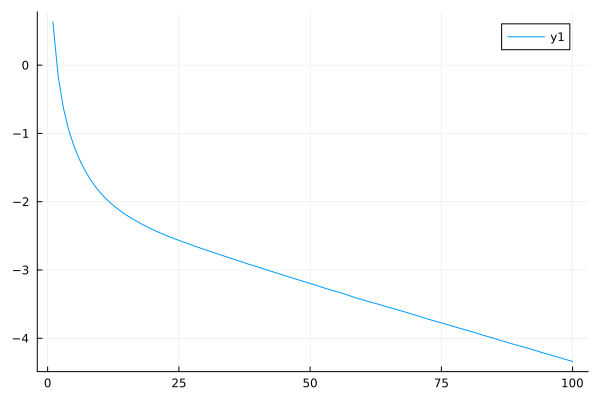

In [145]:
plot(mse_pcd)